In [1]:
# Imports 
import csv
import os

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Funções

# Essa função verifica se já existe um arquivo chamado df_valorado*index*. Assim sempre salva como df_valorado_1, df_valorado_2, etc.
def checkIfFileExists():
    index = 1
    exists = True
    newFileName = ''
    while (exists == True):
        exists = os.path.exists(f'./df_valorado/df_valorado_{index}.csv')
        if (exists == True):
             index += 1
        else:
            newFileName = f'./df_valorado/df_valorado_{index}.csv'
    return newFileName
# --------------------

# Essa função procura e retorna o texto entre duas strings/caracteres dentro de uma string.
# Pode ser usada para, por exemplo, retornar o texto que esteja dentro de aspas ""
def find_between(string, first, last):
    # Exemplo -> 
    try:
        start = string.index(first) + len(first)
        end = string.index(last, start)
        return string[start:end]
    except ValueError:
        return ""
# --------------------

In [3]:
# Apagar se o arquivo existe:
# if os.path.exists('tweets.csv'):
#     os.remove('tweets.csv')
if os.path.exists('tweets-novembro.csv'):
    os.remove('tweets-novembro.csv')
# --------------------

# Abre o arquivo tweets:
# with open('tweets.txt', encoding='utf-8') as txt_file:
with open('tweets-novembro.txt', encoding='utf-8') as txt_file:
    # Lê todas as linhas do .txt dos tweets
    lines = txt_file.readlines()
    # Percorre todas as linhas do .txt e elimina as linhas que não possuem texto
    for index, line in enumerate(lines):
        if (not line.__len__() >= 2):
            lines.pop(index)
        
    # Abre o arquivo onde será salvo um tweet por linha
    # with open('tweets.csv', 'w', encoding='utf-8') as csv_parsed:
    with open('tweets-novembro.csv', 'w', encoding='utf-8') as csv_parsed:
        writer = csv.writer(csv_parsed)

        length = len(lines)
        index = 0
        all_lines = ['']

        # O código a seguir funciona da seguinte maneira:
        # A cada loop, ele lê a linha_atual (current_line), a proxima_primeira_linha (next_first_line), a proxima_segunda_linha (next_second_line), até a proxima_setima_linha.
        # Assim o código lida com o caso onde um tweet possui quebras de linha, e ocupa mais de uma linha.
        # O código procura pelo caractere ';' no final de cada linha, que é o limitador do final do texto de um tweet.
        # Assim, a cada loop, ao ler as próximas 8 linhas, ele define em qual linha o tweet termina, e copia todo esse texto para a string_final (final_line)
        # No final, verifica se todas as linhas atuais estão vazias, e se positivo, encerra o loop.

        umaVez = False
        while (index <= length):
            if (index >= 2000):
                break
            
            final_line = ''
            
            # print(f'index: {index}')
            try:
                current_line = lines[index].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                current_line = ''

            # print(current_line)

            try:
                next_first_line = lines[index + 1].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_first_line = ''

            try:
                next_second_line = lines[index + 2].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_second_line = ''

            try:
                next_third_line = lines[index + 3].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_third_line = ''

            try:
                next_fourth_line = lines[index + 4].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fourth_line = ''

            try:
                next_fifth_line = lines[index + 5].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fifth_line = ''

            try:
                next_sixth_line = lines[index + 6].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_sixth_line = ''

            try:
                next_seventh_line = lines[index + 7].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_seventh_line = ''

            try:
                next_eighth_line = lines[index + 8].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_eighth_line = ''

            try:
                next_nineth_line = lines[index + 9].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_nineth_line = ''

            try:
                next_tenth_line = lines[index + 10].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_tenth_line = ''

            try:
                next_eleventh_line = lines[index + 11].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_eleventh_line = ''

            try:
                next_twelfth_line = lines[index + 12].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_twelfth_line = ''

            try:
                next_thirteenth_line = lines[index + 13].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_thirteenth_line = ''

            try:
                next_fourteenth_line = lines[index + 14].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fourteenth_line = ''

            final_line = ''
            
            # if (index >= 600 and umaVez == False):
            #     if (index == 8000):
            #         umaVez = True
                    
            #     print(f'---------current_line----------- {current_line}')
            #     print(f'---------next_first_line----------- {next_first_line}')
            #     print(f'---------next_second_line----------- {next_second_line}')
            #     print(f'---------next_third_line----------- {next_third_line}')
            #     print(f'---------next_fourth_line----------- {next_fourth_line}')
            #     # print(f'---------next_fifth_line----------- {next_fifth_line}')
            #     # print(f'---------next_sixth_line----------- {next_sixth_line}')
            #     # print(f'---------next_seventh_line----------- {next_seventh_line}')
            #     # print(f'---------next_eighth_line----------- {next_eighth_line}')
            #     # print(f'---------next_nineth_line----------- {next_nineth_line}')
            #     # print(f'---------next_tenth_line----------- {next_tenth_line}')
            #     # print(f'---------next_eleventh_line----------- {next_eleventh_line}')
            #     # print(f'---------next_twelfth_line----------- {next_twelfth_line}')
            #     # print(f'---------next_thirteenth_line----------- {next_thirteenth_line}')
            #     # print(f'---------next_fourteenth_line----------- {next_fourteenth_line}')
            
            if (current_line.endswith(';')):
                final_line = current_line
                index = index + 1
            elif (next_first_line.endswith(';')):
                final_line = f'{current_line} {next_first_line}'
                index = index + 2
            elif (next_second_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line}'
                index = index + 3
            elif (next_third_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line}'
                index = index + 4
            elif (next_fourth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line}'
                index = index + 5
            elif (next_fifth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line}'
                index = index + 6
            elif (next_sixth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line}'
                index = index + 7
            elif (next_seventh_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line}'
                index = index + 8
            elif (next_eighth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line}'
                index = index + 9
            elif (next_nineth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line}'
                index = index + 10
            elif (next_tenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line}'
                index = index + 11
            elif (next_eleventh_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line}'
                index = index + 12
            elif (next_twelfth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line}'
                index = index + 13
            elif (next_thirteenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line} {next_thirteenth_line}'
                index = index + 14
            elif (next_fourteenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line} {next_thirteenth_line} {next_fourteenth_line}'
                index = index + 15

            if len(final_line) > 2:
                all_lines.append(f'{final_line}')
            
            # print(f'final_line: {final_line}')
            # print(f'index: {index}')

            if (final_line == '' 
                and next_first_line == '' 
                and next_second_line == '' 
                and next_third_line == '' 
                and next_fourth_line == '' 
                and next_fifth_line == '' 
                and next_sixth_line == '' 
                and next_seventh_line == ''
                and next_eighth_line == ''
                and next_nineth_line == ''
                and next_tenth_line == ''
                and next_eleventh_line == ''
                and next_twelfth_line == ''
                and next_thirteenth_line == ''
                and next_fourteenth_line == ''
            ):
                break
        # ---- while
        
        all_lines.pop(0)
        # Remove o primeiro elemento vazio inserido na hora da inicialização
        
        writer = csv.writer(csv_parsed)
        
        # Percorre todas as linhas preparadas para salvar no .csv
        # print(f'allLines: {all_lines}')
        indice = 1
        for line in all_lines:
            # text_between_double_quotes = find_between(line, '"', '"')
            # if text_between_double_quotes != '':
            #     line = line.replace(text_between_double_quotes, f'"{text_between_double_quotes}"')

            # Remove os números iniciais de cada linha ('1-', '2-', '3-', etc)
            tweet_index = f'{indice}-'
            if line.startswith(tweet_index):
                line = line.replace(tweet_index, '')

            # Remove o ';' do final de cada linha
            if line.endswith(';'):
                line = line[:-1]

            # Substitui a linha no array pela linha modificada
            all_lines[indice - 1] = line
            line_for_csv = [line]
            
            # Escreve a linha modificada no .csv
            # csv_parsed.write(f'{line}\n')
            writer.writerow(line_for_csv)
            # print(line_for_csv)
            
            indice += 1
        # print(all_lines)
        with open('tweets.csv', encoding='utf-8') as twts:
            df_temp = pd.DataFrame(twts)
            
# --------------------

In [4]:
# Tweets originais = 588
# Tweets novos = 285

df_tweets_orig = pd.read_csv('tweets.csv', encoding='utf-8', on_bad_lines='skip')
df_tweets_nov = pd.read_csv('tweets-novembro.csv', encoding='utf-8', on_bad_lines='skip')
df_novos = pd.concat([df_tweets_orig.iloc[:, 0], df_tweets_nov.iloc[:, 0]], ignore_index = True, axis = 0)
df_novos.to_csv('tweets-completo.csv', encoding = 'utf-8', sep = ';', index = False, header = False)

In [5]:
# Criação do dataframe:

# Lê o .csv do qual deverá ser feito os cálculos
# df = pd.read_csv('tweets.csv', encoding='utf-8', on_bad_lines='skip')
# df = pd.read_csv('tweets-novembro.csv', encoding='utf-8', on_bad_lines='skip')
df = pd.read_csv('tweets-completo.csv', encoding='utf-8', on_bad_lines = 'skip', sep=';')
# df = pd.read_csv('tweets-teste.csv', encoding='utf-8', on_bad_lines = 'skip', header = None, skip_blank_lines = True)
# df = df_novos
# df = pd.read_csv('./kmeans_manual/3ª Avaliação/2-2-1.csv', sep=';', index_col=0)
# --------------------

In [6]:
# Montando array a partir do df
df_array = []
for dados in df.to_numpy():
    for tweet in dados:
        df_array.append(tweet)

cv = CountVectorizer()

In [7]:
# Realização do TF:
word_count_vector = cv.fit_transform(df_array)
tf = word_count_vector.toarray()
df_tf = pd.DataFrame(data = tf, columns = cv.get_feature_names_out())
# df_tf.to_csv('./TF-IDF - CSV/tf.csv', index = False, sep = ';')
# df_tf.to_csv('./TF-IDF - CSV - Novembro/tf.csv', index = False, sep = ';')
df_tf.to_csv('./TF-IDF - CSV - Completo/tf.csv', index = False, sep = ';')
 ## print(f'TF:\n{df_tf}\n\n-------------------')
# --------------------

In [8]:
# Realização do TF-IDF:
tf_idf_vectorizer = TfidfVectorizer()
X = tf_idf_vectorizer.fit_transform(df_array)
feature_names = tf_idf_vectorizer.get_feature_names_out()
x_array = X.toarray()
df_tf_idf = pd.DataFrame(data = x_array, columns = feature_names)
# df_tf_idf.to_csv('./TF-IDF - CSV/tf_idf.csv', index = False, sep = ';')
# df_tf_idf.to_csv('./TF-IDF - CSV - Novembro/tf_idf.csv', index = False, sep = ';')
df_tf_idf.to_csv('./TF-IDF - CSV - Completo/tf_idf.csv', index = False, sep = ';')
## print(f'TF-IDF:\n{df_tf_idf}\n\n-------------------')
# --------------------

In [9]:
# Realização do IDF:
df_idf = df_tf_idf / df_tf
df_idf = df_idf.fillna(0)
# df_idf.to_csv('./TF-IDF - CSV/idf.csv', index = False, sep = ';')
# df_idf.to_csv('./TF-IDF - CSV - Novembro/idf.csv', index = False, sep = ';')
df_idf.to_csv('./TF-IDF - CSV - Completo/idf.csv', index = False, sep = ';')
## print(f'IDF:\n{df_idf}\n\n-------------------')
#--------------------

In [10]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# export_separate_data()

line_for_csv = kmeans.predict(tf_idf_vectorizer.transform(df_array))
# print(f'K-MEANS:\n{line_for_csv}\n\n-------------------')


df_valorado = pd.DataFrame(data = {'Texto': df_array, 'Valor': line_for_csv})
# df_valorado = df_valorado.sort_values(by=['Valor'])
df_valorado = df_valorado.reset_index(drop=True)
# print(f'df_valorado:\n{df_valorado}\n\n-------------------')

In [11]:
# Exportar os tweets valorados
df_valorado_classificado = df_valorado
array_classificacoes = []
for row in df_valorado_classificado.index:
    if df_valorado_classificado['Valor'][row] == 0:
        array_classificacoes.append('Neutro')
    elif df_valorado_classificado['Valor'][row] == 1:
        array_classificacoes.append('Positivo')
    elif df_valorado_classificado['Valor'][row] == 2:
        array_classificacoes.append('Negativo')

df_valorado_classificado = df_valorado_classificado.drop(columns=['Valor'])
df_valorado_classificado.insert(1, 'Classificação', array_classificacoes, allow_duplicates = True)

# df_valorado.to_csv(checkIfFileExists(), sep = ';', index = True)
# df_valorado_classificado.to_csv('df_valorado_classificado.csv', sep = ';', index = True)
# df_valorado_classificado.to_csv('df_valorado_classificado-novembro.csv', sep = ';', index = True)
df_valorado_classificado.to_csv('df_valorado_classificado-completo.csv', sep = ';', index = True)
# --------------------

In [12]:
df_add_column = pd.DataFrame(data = df.values, columns=['Tweets'])

In [13]:
# Gerando o TF com as classificações
df_tf_csv = pd.concat([df_add_column, df_tf], axis=1)
df_tf_csv['Classificação'] = df_valorado_classificado.Classificação
# df_tf_csv.to_csv('df_tf_classificado.csv', sep = ';', index = False)
# df_tf_csv.to_csv('df_tf_classificado - novembro.csv', sep = ';', index = False)
df_tf_csv.to_csv('df_tf_classificado - completo.csv', sep = ';', index = False)
df_tf_csv

,Tweets,00,000,00h00,01,02,03,04,08,09,...,ótimo,ômicron,ônibus,última,último,últimos,únicas,único,útil,Classificação
0,Neymar fazendo live com Bolsonaro pelo fim da ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutro
1,o que o Neymar tá desesperado se o Lula ganhar...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
2,Vendo Tarcisio agora pelo “Flow” e também em o...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
3,BOLSONARO NÃO CONHECIA SEU VIZINHO QUE MATOU M...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
4,"“Não existe ideologia de gênero, isso é uma me...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Se vcs pararem o video do Bolsonaro em 1:32 vc...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
868,Chegamos nesse ponto: Lula no poder o que pode...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivo
869,"Só pra esclarecer uma coisa aqui, Bolsonaro nã...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
870,O cara perdeu uma eleição legítima e não conse...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo


In [14]:
# Gerando o IDF com as classificações
df_idf_csv = pd.concat([df_add_column, df_idf], axis=1)
df_idf_csv['Classificação'] = df_valorado_classificado.Classificação
# df_idf_csv.to_csv('df_idf_classificado.csv', sep = ';', index = False)
# df_idf_csv.to_csv('df_idf_classificado - novembro.csv', sep = ';', index = False)
df_idf_csv.to_csv('df_idf_classificado - completo.csv', sep = ';', index = False)
df_idf_csv

,Tweets,00,000,00h00,01,02,03,04,08,09,...,ótimo,ômicron,ônibus,última,último,últimos,únicas,único,útil,Classificação
0,Neymar fazendo live com Bolsonaro pelo fim da ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutro
1,o que o Neymar tá desesperado se o Lula ganhar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
2,Vendo Tarcisio agora pelo “Flow” e também em o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
3,BOLSONARO NÃO CONHECIA SEU VIZINHO QUE MATOU M...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
4,"“Não existe ideologia de gênero, isso é uma me...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Se vcs pararem o video do Bolsonaro em 1:32 vc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
868,Chegamos nesse ponto: Lula no poder o que pode...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivo
869,"Só pra esclarecer uma coisa aqui, Bolsonaro nã...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
870,O cara perdeu uma eleição legítima e não conse...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo


In [15]:
# Gerando o TF-IDF com as classificações
df_tf_idf_csv = pd.concat([df_add_column, df_tf_idf], axis=1)
# df_tf_idf_csv = df_tf_idf_csv.reset_index()
# df_tf_idf_csv = df_tf_idf_csv.drop(columns=['index'])
df_tf_idf_csv["Classificação"] = df_valorado_classificado.Classificação
# print(f'df_tf_idf_csv: --------------- \n\n {df_tf_idf_csv}')

# df_tf_idf_csv.to_csv('df_tf_idf_classificado.csv', sep = ';', index = False)
# df_tf_idf_csv.to_csv('df_tf_idf_classificado - novembro.csv', sep = ';', index = False)
df_tf_idf_csv.to_csv('df_tf_idf_classificado - completo.csv', sep = ';', index = False)
df_tf_idf_csv

,Tweets,00,000,00h00,01,02,03,04,08,09,...,ótimo,ômicron,ônibus,última,último,últimos,únicas,único,útil,Classificação
0,Neymar fazendo live com Bolsonaro pelo fim da ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutro
1,o que o Neymar tá desesperado se o Lula ganhar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
2,Vendo Tarcisio agora pelo “Flow” e também em o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
3,BOLSONARO NÃO CONHECIA SEU VIZINHO QUE MATOU M...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
4,"“Não existe ideologia de gênero, isso é uma me...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Se vcs pararem o video do Bolsonaro em 1:32 vc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
868,Chegamos nesse ponto: Lula no poder o que pode...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positivo
869,"Só pra esclarecer uma coisa aqui, Bolsonaro nã...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo
870,O cara perdeu uma eleição legítima e não conse...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negativo


# C3

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df_tf_read = pd.read_csv('df_tf_classificado - completo.csv', encoding = 'utf-8 ', on_bad_lines = 'skip', sep = ';')
df_tf_dados_orig = df_tf_read.head(588)
print(df_tf_dados_orig.iloc[:,0])

0      Neymar fazendo live com Bolsonaro pelo fim da ...
1      o que o Neymar tá desesperado se o Lula ganhar...
2      Vendo Tarcisio agora pelo “Flow” e também em o...
3      BOLSONARO NÃO CONHECIA SEU VIZINHO QUE MATOU M...
4      “Não existe ideologia de gênero, isso é uma me...
                             ...                        
583    Gravíssimo: bolsonarista preso após ameaçar Lu...
584    Michelle Bolsonaro tá sendo criticada pela GLO...
585    Michele Bolsonaro precisa entender que o Estad...
586    Menor consumo médio de carne bovina nos último...
587    Alguém me ajuda? Estou precisando de uma foto ...
Name: Tweets, Length: 588, dtype: object


In [18]:
df_tf_nov_read = pd.read_csv('df_tf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_tf_dados_nov = df_tf_nov_read.iloc[-284:]
print(df_tf_dados_nov.iloc[:,0])

588    A nova ideia genial de Bolsonaro: cancelar urn...
589    Resumindo: a lei exige que todas as urnas seja...
590    ATENÇÃO: Apesar da contestação do PL e do futu...
591    URGENTE! O Governo Bolsonaro bloqueia mais R$ ...
592    Relatório de auditoria das urnas aponta Bolson...
                             ...                        
867    Se vcs pararem o video do Bolsonaro em 1:32 vc...
868    Chegamos nesse ponto: Lula no poder o que pode...
869    Só pra esclarecer uma coisa aqui, Bolsonaro nã...
870    O cara perdeu uma eleição legítima e não conse...
871    Os palestinos adoram o Lula tambem porque ele ...
Name: Tweets, Length: 284, dtype: object


In [19]:
# Train Test

# TF ->
df_tf_read = pd.read_csv('df_tf_classificado - completo.csv', encoding = 'utf-8 ', on_bad_lines = 'skip', sep = ';')
df_tf_dados_orig = df_tf_read.head(588)
df_tf_dados_orig = df_tf_dados_orig.drop(columns = 'Tweets', inplace = False)
print('TF_orig -> \n', df_tf_dados_orig.head())

# IDF -> 
df_idf_read = pd.read_csv('df_idf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_idf_dados_orig = df_idf_read.head(588)
df_idf_dados_orig = df_idf_dados_orig.drop(columns = 'Tweets', inplace = False)
print('IDF_orig -> \n', df_idf_dados_orig.head())

# TF-IDF ->
df_tf_idf_read = pd.read_csv('df_tf_idf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_tf_idf_dados_orig = df_tf_idf_read.head(588)
df_tf_idf_dados_orig = df_tf_idf_dados_orig.drop(columns = 'Tweets', inplace = False)
print('TF-IDF_orig -> \n', df_tf_idf_dados_orig.head())

# --------->
# Predict

# TF ->

df_tf_nov_read = pd.read_csv('df_tf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_tf_dados_nov = df_tf_nov_read.iloc[-284:]
df_tf_dados_nov = df_tf_dados_nov.drop(columns = 'Tweets', inplace = False)
print('TF-nov -> \n', df_tf_dados_nov.head())

# IDF ->
df_idf_nov_read = pd.read_csv('df_idf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_idf_dados_nov = df_idf_nov_read.iloc[-284:]
df_idf_dados_nov = df_idf_dados_nov.drop(columns = 'Tweets', inplace = False)
print('IDF-nov -> \n', df_idf_dados_nov.head())

# TF-IDF ->
df_tf_idf_nov_read = pd.read_csv('df_tf_idf_classificado - completo.csv', encoding = 'utf-8', on_bad_lines = 'skip', sep = ';')
df_tf_idf_dados_nov = df_tf_idf_nov_read.iloc[-284:]
df_tweets_nov = pd.DataFrame(data = {'Tweets': df_tf_idf_dados_nov.iloc[:, 0]})
df_tweets_nov = df_tweets_nov.reset_index(drop = True)
df_tf_idf_dados_nov = df_tf_idf_dados_nov.drop(columns = 'Tweets', inplace = False)
print('TF-IDF-nov -> \n', df_tf_idf_dados_nov.head())


TF_orig -> 
    00  000  00h00  01  02  03  04  08  09  10  ...  ótimo  ômicron  ônibus  \
0   0    0      0   0   0   0   0   0   0   0  ...      0        0       0   
1   0    0      0   0   0   0   0   0   0   0  ...      0        0       0   
2   0    0      0   0   0   0   0   0   0   0  ...      0        0       0   
3   0    0      0   0   0   0   0   0   0   0  ...      0        0       0   
4   0    0      0   0   0   0   0   0   0   0  ...      0        0       0   

   última  último  últimos  únicas  único  útil  Classificação  
0       0       0        0       0      0     0         Neutro  
1       0       0        0       0      0     0       Negativo  
2       0       0        0       0      0     0       Negativo  
3       0       0        0       0      0     0       Negativo  
4       0       0        0       0      0     0       Negativo  

[5 rows x 5098 columns]
IDF_orig -> 
     00  000  00h00   01   02   03   04   08   09   10  ...  ótimo  ômicron  \
0  0.0  0.0

In [20]:
import scikitplot as skplt
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes

<h4> TF Originais </h4>

In [21]:
# TF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_tf = df_tf_dados_orig.iloc[:, 0:-1].values

# Seleciona todas as linhas, apenas da última coluna
y_tf = df_tf_dados_orig.iloc[:, -1].values

# Train-Test Split
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size = 0.50, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_tf_train = sc.fit_transform(X_tf_train)
X_tf_test = sc.fit_transform(X_tf_test)

# Naive-Bayes
naive_tf = GaussianNB()
naive_tf.fit(X_tf_train, y_tf_train)

# TF - Predição
y_tf_pred = naive_tf.predict(X_tf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_tf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_tf_pred)
print('---------------------')

Valores usados no Teste
['Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Negativo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Positivo'
 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Positivo'
 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'Neutro' 'Positivo' 'Positivo' 'Negativo'
 'Negativo' 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Neutro'
 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro' 'Neutro' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo'
 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo'
 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Negativo'
 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'N

Métricas dos resultados do TF
              precision    recall  f1-score   support

    Negativo       0.44      0.59      0.50        95
      Neutro       0.40      0.36      0.38        59
    Positivo       0.54      0.44      0.48       140

    accuracy                           0.47       294
   macro avg       0.46      0.46      0.45       294
weighted avg       0.48      0.47      0.47       294



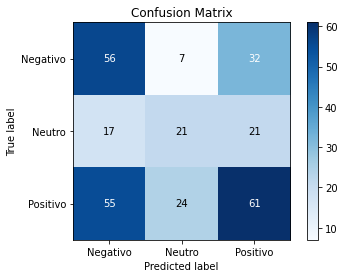

In [22]:
# Métricas dos resultados
print('Métricas dos resultados do TF')
print(classification_report(y_tf_test, y_tf_pred))

# Confusion Matrix do TF
cm = skplt.metrics.plot_confusion_matrix(y_tf_test, y_tf_pred)

<h4>IDF Originais</h4>

In [23]:
# IDF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_idf = df_idf_dados_orig.iloc[:, 0:-1].values

# Seleciona todas as linhas, apenas da última coluna
y_idf = df_idf_dados_orig.iloc[:, -1].values

# Train-Test Split
X_idf_train, X_idf_test, y_idf_train, y_idf_test = train_test_split(X_idf, y_idf, test_size = 0.50, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_idf_train = sc.fit_transform(X_idf_train)
X_idf_test = sc.fit_transform(X_idf_test)

# Naive-Bayes
naive_idf = GaussianNB()
naive_idf.fit(X_idf_train, y_idf_train)

# TF - Predição
y_idf_pred = naive_idf.predict(X_idf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_idf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_idf_pred)
print('---------------------')

Valores usados no Teste
['Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Negativo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Positivo'
 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Positivo'
 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'Neutro' 'Positivo' 'Positivo' 'Negativo'
 'Negativo' 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Neutro'
 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro' 'Neutro' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo'
 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo'
 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Negativo'
 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'N

Métricas dos resultados
              precision    recall  f1-score   support

    Negativo       0.43      0.59      0.50        95
      Neutro       0.40      0.32      0.36        59
    Positivo       0.52      0.43      0.47       140

    accuracy                           0.46       294
   macro avg       0.45      0.45      0.44       294
weighted avg       0.47      0.46      0.46       294



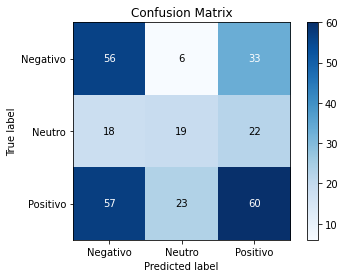

In [24]:
# Métricas dos resultados
print('Métricas dos resultados')
print(classification_report(y_idf_test, y_idf_pred))

# Confusion Matrix do IDF
cm = skplt.metrics.plot_confusion_matrix(y_idf_test, y_idf_pred)

<h4>TF-IDF Originais</h4>

In [25]:
# TF-IDF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_tf_idf = df_tf_idf_dados_orig.iloc[:, 0:-1].values

# Seleciona todas as linhas, apenas da última coluna
y_tf_idf = df_tf_idf_dados_orig.iloc[:, -1].values

# Train-Test Split
X_tf_idf_train, X_tf_idf_test, y_tf_idf_train, y_tf_idf_test = train_test_split(X_tf_idf, y_tf_idf, test_size = 0.50, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_tf_idf_train = sc.fit_transform(X_tf_idf_train)
X_tf_idf_test = sc.fit_transform(X_tf_idf_test)

# Naive-Bayes
naive_tf_idf = GaussianNB()
naive_tf_idf.fit(X_tf_idf_train, y_tf_idf_train)

# TF - Predição
y_tf_idf_pred = naive_tf_idf.predict(X_tf_idf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_tf_idf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_tf_idf_pred)
print('---------------------')

Valores usados no Teste
['Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Negativo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Positivo'
 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Positivo'
 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'Neutro' 'Positivo' 'Positivo' 'Negativo'
 'Negativo' 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Neutro'
 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro' 'Neutro' 'Positivo'
 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Positivo' 'Negativo'
 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo'
 'Negativo' 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Negativo'
 'Negativo' 'Positivo' 'Positivo' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Positivo'
 'Positivo' 'Positivo' 'N

Métricas dos resultados
              precision    recall  f1-score   support

    Negativo       0.43      0.59      0.50        95
      Neutro       0.40      0.36      0.38        59
    Positivo       0.53      0.43      0.47       140

    accuracy                           0.47       294
   macro avg       0.46      0.46      0.45       294
weighted avg       0.47      0.47      0.46       294



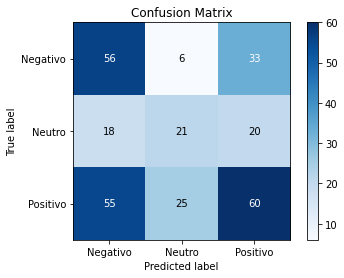

In [26]:
# Métricas dos resultados
print('Métricas dos resultados')
print(classification_report(y_tf_idf_test, y_tf_idf_pred))

# Confusion Matrix do TF-IDF
cm = skplt.metrics.plot_confusion_matrix(y_tf_idf_test, y_tf_idf_pred)

<h4>Métricas dos Resultados</h4>

In [27]:
tf_micro_f1 = f1_score(y_tf_test, y_tf_pred, average = 'micro')
tf_macro_f1 = f1_score(y_tf_test, y_tf_pred, average = 'macro')
tf_micro_precision = precision_score(y_tf_test, y_tf_pred, average = 'micro')
tf_macro_precision = precision_score(y_tf_test, y_tf_pred, average = 'macro')
tf_micro_recall = recall_score(y_tf_test, y_tf_pred, average = 'micro')
tf_macro_recall = recall_score(y_tf_test, y_tf_pred, average = 'macro')

idf_micro_f1 = f1_score(y_idf_test, y_idf_pred, average = 'micro')
idf_macro_f1 = f1_score(y_idf_test, y_idf_pred, average = 'macro')
idf_micro_precision = precision_score(y_idf_test, y_idf_pred, average = 'micro')
idf_macro_precision = precision_score(y_idf_test, y_idf_pred, average = 'macro')
idf_micro_recall = recall_score(y_idf_test, y_idf_pred, average = 'micro')
idf_macro_recall = recall_score(y_idf_test, y_idf_pred, average = 'macro')

tf_idf_micro_f1 = f1_score(y_tf_idf_test, y_tf_idf_pred, average = 'micro')
tf_idf_macro_f1 = f1_score(y_tf_idf_test, y_tf_idf_pred, average = 'macro')
tf_idf_micro_precision = precision_score(y_tf_idf_test, y_tf_idf_pred, average = 'micro')
tf_idf_macro_precision = precision_score(y_tf_idf_test, y_tf_idf_pred, average = 'macro')
tf_idf_micro_recall = recall_score(y_tf_idf_test, y_tf_idf_pred, average = 'micro')
tf_idf_macro_recall = recall_score(y_tf_idf_test, y_tf_idf_pred, average = 'macro')

df_results = pd.DataFrame(data = {
  'Micro-F1': [tf_micro_f1, idf_micro_f1, tf_idf_micro_f1], 
  'Macro-F1': [tf_macro_f1, idf_macro_f1, tf_idf_macro_f1], 
  'Precision (micro-macro avg)': [(tf_micro_precision + tf_macro_precision) / 2, (idf_micro_precision + idf_macro_precision) / 2, (tf_idf_micro_precision + tf_idf_macro_precision) / 2],
  'Recall (micro-macro avg)': [(tf_micro_recall + tf_macro_recall) / 2, (idf_micro_recall + idf_macro_recall) / 2, (tf_idf_micro_recall + tf_idf_macro_recall) / 2]
}, index = ['TF', 'IDF', 'TF-IDF'])
df_results

,Micro-F1,Macro-F1,Precision (micro-macro avg),Recall (micro-macro avg)
TF,0.469388,0.453645,0.464100,0.464881
IDF,0.459184,0.440435,0.453767,0.452938
TF-IDF,0.465986,0.450896,0.461148,0.461989


# KNN

In [28]:
knn_tf = KNeighborsClassifier(n_neighbors = 5)
knn_tf.fit(X_tf_train, y_tf_train)

knn_idf = KNeighborsClassifier(n_neighbors = 5)
knn_idf.fit(X_idf_train, y_idf_train)

knn_tf_idf = KNeighborsClassifier(n_neighbors = 5)
knn_tf_idf.fit(X_tf_idf_train, y_tf_idf_train)

y_tf_pred_knn = knn_tf.predict(X_tf_test)

y_idf_pred_knn = knn_tf.predict(X_idf_test)

y_tf_idf_pred_knn = knn_tf.predict(X_tf_idf_test)

<h4>Métricas dos Resultados</h4>

In [29]:
tf_micro_f1_knn = f1_score(y_tf_test, y_tf_pred_knn, average = 'micro', zero_division = 0)
tf_macro_f1_knn = f1_score(y_tf_test, y_tf_pred_knn, average = 'macro', zero_division = 0)
tf_micro_precision_knn = precision_score(y_tf_test, y_tf_pred_knn, average = 'micro', zero_division = 0)
tf_macro_precision_knn = precision_score(y_tf_test, y_tf_pred_knn, average = 'macro', zero_division = 0)
tf_micro_recall_knn = recall_score(y_tf_test, y_tf_pred_knn, average = 'micro', zero_division = 0)
tf_macro_recall_knn = recall_score(y_tf_test, y_tf_pred_knn, average = 'macro', zero_division = 0)

idf_micro_f1_knn = f1_score(y_idf_test, y_idf_pred_knn, average = 'micro', zero_division = 0)
idf_macro_f1_knn = f1_score(y_idf_test, y_idf_pred_knn, average = 'macro', zero_division = 0)
idf_micro_precision_knn = precision_score(y_idf_test, y_idf_pred_knn, average = 'micro', zero_division = 0)
idf_macro_precision_knn = precision_score(y_idf_test, y_idf_pred_knn, average = 'macro', zero_division = 0)
idf_micro_recall_knn = recall_score(y_idf_test, y_idf_pred_knn, average = 'micro', zero_division = 0)
idf_macro_recall_knn = recall_score(y_idf_test, y_idf_pred_knn, average = 'macro', zero_division = 0)

tf_idf_micro_f1_knn = f1_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'micro', zero_division = 0)
tf_idf_macro_f1_knn = f1_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'macro', zero_division = 0)
tf_idf_micro_precision_knn = precision_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'micro', zero_division = 0)
tf_idf_macro_precision_knn = precision_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'macro', zero_division = 0)
tf_idf_micro_recall_knn = recall_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'micro', zero_division = 0)
tf_idf_macro_recall_knn = recall_score(y_tf_idf_test, y_tf_idf_pred_knn, average = 'macro', zero_division = 0)

df_results_knn = pd.DataFrame(data = {
  'Micro-F1': [tf_micro_f1_knn, idf_micro_f1_knn, tf_idf_micro_f1_knn], 
  'Macro-F1': [tf_macro_f1_knn, idf_macro_f1_knn, tf_idf_macro_f1_knn], 
  'Precision (micro-macro avg)': [(tf_micro_precision_knn + tf_macro_precision_knn) / 2, (idf_micro_precision_knn + idf_macro_precision_knn) / 2, (tf_idf_micro_precision_knn + tf_idf_macro_precision_knn) / 2],
  'Recall (micro-macro avg)': [(tf_micro_recall_knn + tf_macro_recall_knn) / 2, (idf_micro_recall_knn + idf_macro_recall_knn) / 2, (tf_idf_micro_recall_knn + tf_idf_macro_recall_knn) / 2]
}, index = ['TF', 'IDF', 'TF-IDF'])
df_results_knn

,Micro-F1,Macro-F1,Precision (micro-macro avg),Recall (micro-macro avg)
TF,0.204082,0.116471,0.302268,0.269898
IDF,0.204082,0.116471,0.302268,0.269898
TF-IDF,0.207483,0.121450,0.304084,0.272789


<h4>Ao comparar os resultados, o Naive Bayes se mostrou ter resultados melhores que o KNN</h4>

<h4>TF Predito - Naive Bayes</h4>

In [30]:
# Seleciona todas as linhas, de todas as colunas, exceto a última
X_tf_nov = df_tf_dados_nov.iloc[:, 0:-1].values
X_idf_nov = df_idf_dados_nov.iloc[:, 0:-1].values
X_tf_idf_nov = df_tf_idf_dados_nov.iloc[:, 0:-1].values

y_tf_nov_res = naive_tf.predict(X_tf_nov)
y_idf_nov_res = naive_idf.predict(X_idf_nov)
y_tf_idf_nov_res = naive_tf_idf.predict(X_tf_idf_nov)

df_tf_predito = pd.DataFrame(data = {'Tweets': df_tweets_nov.iloc[:, 0], 'Classificação': y_tf_nov_res})
df_tf_predito = df_tf_predito.reset_index(drop = True)
df_tf_predito.to_csv('TF-IDF Predito - Naive Bayes/tf_naive_bayes.csv', encoding = 'utf-8', sep = ';', index = False)

df_idf_predito = pd.DataFrame(data = {'Tweets': df_tweets_nov.iloc[:, 0], 'Classificação': y_idf_nov_res})
df_idf_predito = df_idf_predito.reset_index(drop = True)
df_idf_predito.to_csv('TF-IDF Predito - Naive Bayes/idf_naive_bayes.csv', encoding = 'utf-8', sep = ';', index = False)

df_tf_idf_predito = pd.DataFrame(data = {'Tweets': df_tweets_nov.iloc[:, 0], 'Classificação': y_tf_idf_nov_res})
df_tf_idf_predito = df_tf_idf_predito.reset_index(drop = True)
df_tf_idf_predito.to_csv('TF-IDF Predito - Naive Bayes/tf_idf_naive_bayes.csv', encoding = 'utf-8', sep = ';', index = False)

df_ponderacoes_preditas = pd.DataFrame(data = {'Tweets': df_tweets_nov.iloc[:, 0], 'TF': df_tf_predito.iloc[:, 1], 'IDF': df_idf_predito.iloc[:, 1], 'TF-IDF': df_tf_idf_predito.iloc[:, 1]})
df_ponderacoes_preditas.to_csv('TF-IDF Predito - Naive Bayes/tweets_valores_preditos.csv', encoding = 'utf-8', sep = ';', index = False)
df_ponderacoes_preditas

,Tweets,TF,IDF,TF-IDF
0,A nova ideia genial de Bolsonaro: cancelar urn...,Positivo,Negativo,Negativo
1,Resumindo: a lei exige que todas as urnas seja...,Negativo,Negativo,Negativo
2,ATENÇÃO: Apesar da contestação do PL e do futu...,Positivo,Negativo,Negativo
3,URGENTE! O Governo Bolsonaro bloqueia mais R$ ...,Positivo,Negativo,Negativo
4,Relatório de auditoria das urnas aponta Bolson...,Negativo,Negativo,Negativo
...,...,...,...,...
279,Se vcs pararem o video do Bolsonaro em 1:32 vc...,Negativo,Negativo,Negativo
280,Chegamos nesse ponto: Lula no poder o que pode...,Negativo,Negativo,Negativo
281,"Só pra esclarecer uma coisa aqui, Bolsonaro nã...",Negativo,Negativo,Negativo
282,O cara perdeu uma eleição legítima e não conse...,Negativo,Negativo,Negativo


# Análise sobre os resultados obtidos

<h4>Nuvem de Palavras</h4>

In [50]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from matplotlib.colors import ListedColormap

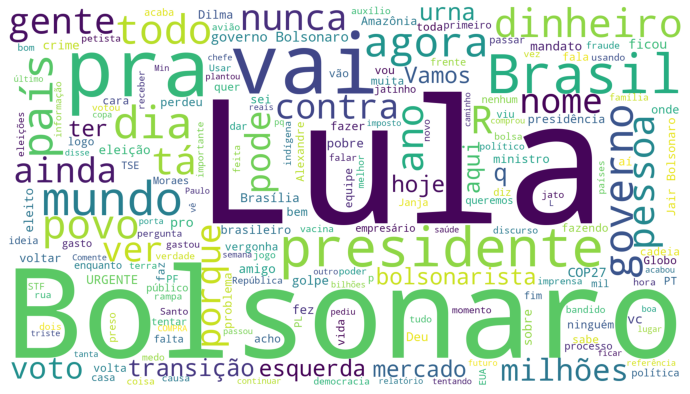

In [59]:
words = df_ponderacoes_preditas['Tweets']
all_words = ' '.join(w for w in words)
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

def plot_wordcloud(wc):
  fig, ax = plt.subplots(figsize=(14,7))
  ax.imshow(wc, interpolation = 'bilinear')
  ax.set_axis_off()
  plt.imshow(wc)

wc = WordCloud(stopwords = stopwords, background_color = 'white', width = 1920, height = 1080).generate(all_words)

plot_wordcloud(wc)

<p>Ao analisar a nuvem de palavras, vemos que palavras como "mercado", "dinheiro", "milhões", "governo", "país", "voto" são muito comuns nestes tweets.<br> Palavras essas que podem ser relacionadas à situação econômica, atual ou futura, de nosso país.</p>
<p>Podemos concluir que as pessoas aparentam estar seriamente preocupadas com o futuro econômico do Brasil.</p>

<h4>Postagens que corroboram suas classificações aplicadas</h4>

In [66]:
postagem1 = df_ponderacoes_preditas.loc[2]
postagem2 = df_ponderacoes_preditas.loc[205]
postagem3 = df_ponderacoes_preditas.loc[85]

df_corroboracao = pd.DataFrame(data = {'Postagem': [postagem1['Tweets'], postagem2['Tweets'], postagem3['Tweets']], 'Classificação': [postagem1['TF'], postagem2['TF'], postagem3['TF']]})
df_corroboracao

,Postagem,Classificação
0,ATENÇÃO: Apesar da contestação do PL e do futu...,Positivo
1,Excelentíssimo senhor Ministro da Saúde @mquei...,Neutro
2,Casa que foi comitê da campanha do Bolsonaro e...,Negativo
